In [1]:
# import pandas
import pandas as pd

# Read csv files
train = pd.read_csv('C:/Users/User/Documents/人工智慧【Artificial Intelligence】/作業/TA Class #1/train.csv')

# One-hot encoding on 'color'
colors = pd.get_dummies(train['color'].rename(columns=lambda x: 'color_' + str(x)))
train = pd.concat([train, colors], axis = 1)

# Mapping string to numeric value on 'type'
type_to_label = {'Ghost': 0, 'Ghoul': 1, 'Goblin': 2}
train['type'] = train['type'].map(type_to_label)

# Remove redundant columns
train = train.drop(axis = 1, labels = ['id', 'color'])

# Move 'type' to the last column and One-hot encoding on 'type'
train = pd.get_dummies(train,columns=["type" ])

# Get trainX and trainY
trainX = train.iloc[:,0:10]
trainY = train.iloc[:,10:13]

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define your model
model = Sequential()

model.add(Dense(units = 512,
                input_dim = 10,
                activation = 'relu'))
model.add(Dense(units = 128,
                input_dim = 512,
                activation = 'relu'))
model.add(Dense(units = 3,
                activation = 'softmax'))

# Define the loss function and optimizer
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Start training
train_history = model.fit(x = trainX,
                          y = trainY,
                          validation_split = 0.2,
                          epochs = 150,
                          batch_size = 100,
                          verbose = 2)

C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 296 samples, validate on 75 samples
Epoch 1/150
 - 0s - loss: 1.1029 - acc: 0.4122 - val_loss: 1.0809 - val_acc: 0.4000
Epoch 2/150
 - 0s - loss: 1.0655 - acc: 0.5000 - val_loss: 1.0532 - val_acc: 0.4400
Epoch 3/150
 - 0s - loss: 1.0325 - acc: 0.5203 - val_loss: 1.0308 - val_acc: 0.4533
Epoch 4/150
 - 0s - loss: 1.0014 - acc: 0.6250 - val_loss: 1.0135 - val_acc: 0.5867
Epoch 5/150
 - 0s - loss: 0.9675 - acc: 0.6385 - val_loss: 0.9930 - val_acc: 0.5200
Epoch 6/150
 - 0s - loss: 0.9304 - acc: 0.6385 - val_loss: 0.9616 - val_acc: 0.6000
Epoch 7/150
 - 0s - loss: 0.8898 - acc: 0.6689 - val_loss: 0.9242 - val_acc: 0.6667
Epoch 8/150
 - 0s - loss: 0.8482 - acc: 0.7061 - val_loss: 0.8918 - val_acc: 0.6400
Epoch 9/150
 - 0s - loss: 0.8060 - acc: 0.7061 - val_loss: 0.8598 - val_acc: 0.6267
Epoch 10/150
 - 0s - loss: 0.7640 - acc: 0.7095 - val_loss: 0.8287 - val_acc: 0.6533
Epoch 11/150
 - 0s - loss: 0.7272 - acc: 0.6993 - val_loss: 0.8014 - val_acc: 0.6533
Epoch 12/150
 - 0s - loss: 0.

Epoch 97/150
 - 0s - loss: 0.4194 - acc: 0.7838 - val_loss: 0.6487 - val_acc: 0.6933
Epoch 98/150
 - 0s - loss: 0.4220 - acc: 0.7872 - val_loss: 0.6633 - val_acc: 0.7200
Epoch 99/150
 - 0s - loss: 0.4169 - acc: 0.7703 - val_loss: 0.6483 - val_acc: 0.7067
Epoch 100/150
 - 0s - loss: 0.4219 - acc: 0.7770 - val_loss: 0.6378 - val_acc: 0.7200
Epoch 101/150
 - 0s - loss: 0.4171 - acc: 0.7838 - val_loss: 0.6709 - val_acc: 0.6933
Epoch 102/150
 - 0s - loss: 0.4245 - acc: 0.7872 - val_loss: 0.6427 - val_acc: 0.7200
Epoch 103/150
 - 0s - loss: 0.4139 - acc: 0.7703 - val_loss: 0.6496 - val_acc: 0.7200
Epoch 104/150
 - 0s - loss: 0.4223 - acc: 0.7703 - val_loss: 0.6678 - val_acc: 0.7200
Epoch 105/150
 - 0s - loss: 0.4160 - acc: 0.7669 - val_loss: 0.6450 - val_acc: 0.7200
Epoch 106/150
 - 0s - loss: 0.4149 - acc: 0.7804 - val_loss: 0.6501 - val_acc: 0.7200
Epoch 107/150
 - 0s - loss: 0.4159 - acc: 0.7905 - val_loss: 0.6558 - val_acc: 0.7333
Epoch 108/150
 - 0s - loss: 0.4128 - acc: 0.7838 - val_lo

In [3]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

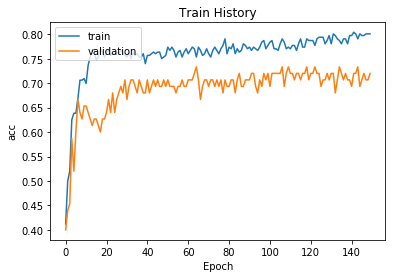

In [4]:
show_train_history(train_history,'acc','val_acc')

In [5]:
# Read csv files
test = pd.read_csv("C:/Users/User/Documents/人工智慧【Artificial Intelligence】/作業/TA Class #1/test.csv")

# One-hot encoding on 'color'
colors = pd.get_dummies(test['color'].rename(columns=lambda x: 'color_' + str(x)))
test = pd.concat([test, colors], axis = 1)

# Predict testY
testX = test.drop(axis = 1, labels = ['id', 'color'])
testY = model.predict_classes(testX)

# Change to word
testY = pd.DataFrame({'id': test.id, 'type': testY})
testY_dict = {0:'Ghost', 1:'Ghoul', 2:'Goblin'}
testY['type'] = testY['type'].map(testY_dict)
testY.to_csv('sample_submission.csv', index=False, header = True)
